In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [155]:
#Use read_html to find tables
mars_df = pd.read_html('https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html')
mars_df

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [156]:
#create df from first table
mars_df = mars_df[0]
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [157]:
#inspect data types
mars_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [158]:
#convert terrestrial_date to datetime

mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])

In [159]:
#inspect data types
mars_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [160]:
#How many months exist on Mars? - 12 months
mars_df['month'].unique()


array([ 6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5], dtype=int64)

In [161]:
#How many Martian (and not Earth) days worth of data exist in the scraped dataset? - 1,867 sols
mars_df.nunique()

id                  1867
terrestrial_date    1867
sol                 1867
ls                   360
month                 12
min_temp              29
pressure             199
dtype: int64

In [162]:
#What are the coldest and the warmest months on Mars (at the location of Curiosity)? Coldest - Month 3. Warmest - Month 8
#Get the answer by averaging the minimum daily temperature of all the months. Plot the results as a bar chart.
mars_grouped_df = mars_df.groupby("month").mean().reset_index()
mars_grouped_df[["month", "min_temp"]]


,month,min_temp
0,1,-77.160920
1,2,-79.932584
2,3,-83.307292
3,4,-82.747423
4,5,-79.308725
5,6,-75.299320
6,7,-72.281690
7,8,-68.382979
8,9,-69.171642
9,10,-71.982143


Text(0, 0.5, 'Temperature')

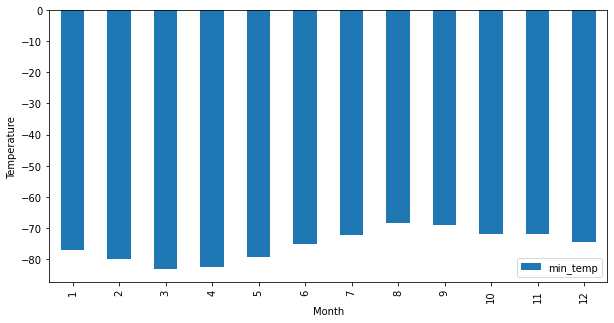

In [163]:
mars_temps_df.plot.bar(x="month", y="min_temp", figsize=(10, 5))
plt.xlabel("Month")
plt.ylabel("Temperature")


In [164]:
#Which months have the lowest and the highest atmospheric pressure on Mars? - Lowest - Month 6. Highest - Month 9
#Get the answer by averaging the daily atmospheric pressure of all the months. 
mars_grouped_df = mars_df.groupby("month").mean().reset_index()
mars_grouped_df[["month", "pressure"]]

,month,pressure
0,1,862.488506
1,2,889.455056
2,3,877.322917
3,4,806.329897
4,5,748.557047
5,6,745.054422
6,7,795.105634
7,8,873.829787
8,9,913.305970
9,10,887.312500


Text(0, 0.5, 'Pressure')

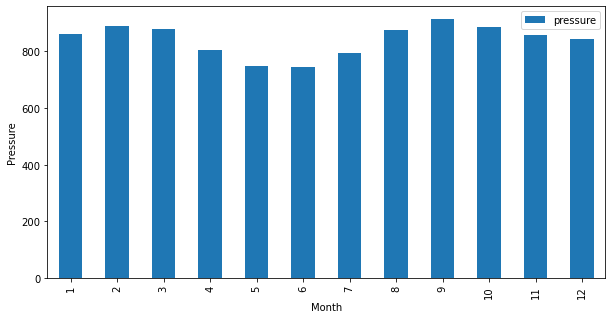

In [165]:
#Plot the results as a bar chart.
mars_grouped_df.plot.bar(x="month", y="pressure", figsize=(10, 5))
plt.xlabel("Month")
plt.ylabel("Pressure")


In [166]:
#About how many terrestrial (Earth) days exist in a Martian year? 
#That is, in the time that Mars circles the Sun once, how many days elapse on Earth? 
#Visually estimate the result by plotting the daily minimum temperature.
mars_grouped_df = mars_df.groupby('month').mean().reset_index()
mars_grouped_df


,month,id,sol,ls,min_temp,pressure
0,1,1013.873563,1077.574713,15.281609,-77.160920,862.488506
1,2,1109.882022,1175.853933,44.258427,-79.932584,889.455056
2,3,1132.697917,1204.406250,75.010417,-83.307292,877.322917
3,4,1175.164948,1244.500000,104.365979,-82.747423,806.329897
4,5,1115.033557,1182.691275,132.885906,-79.308725,748.557047
5,6,735.306122,750.829932,164.897959,-75.299320,745.054422
6,7,714.549296,715.105634,194.894366,-72.281690,795.105634
7,8,718.078014,795.333333,224.347518,-68.382979,873.829787
8,9,785.843284,861.186567,254.052239,-69.171642,913.305970
9,10,955.723214,1034.669643,286.330357,-71.982143,887.312500


Text(0, 0.5, 'Temperature')

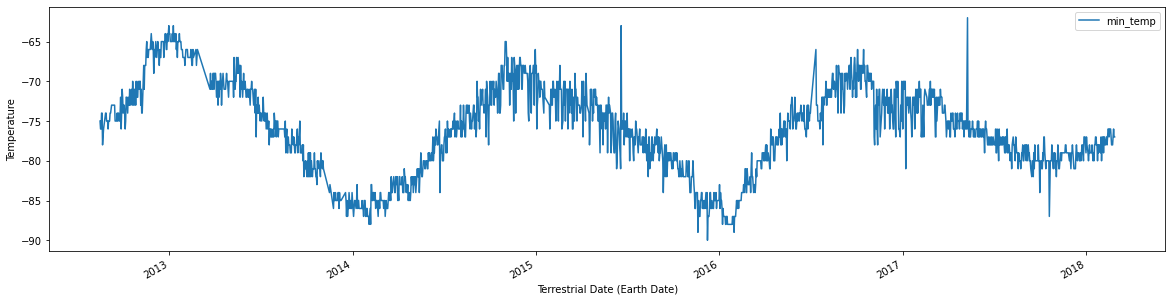

In [167]:
#Plot the results
#daily_min_temps_df.plot(x="terrestrial_date", y="min_temp", figsize=(15, 10))
#daily_min_temps_df.plot(x="ls", y="min_temp", figsize=(15, 10))
mars_df.plot.line(x="terrestrial_date", y="min_temp", figsize=(20, 5))
plt.xlabel("Terrestrial Date (Earth Date)")
plt.ylabel("Temperature")



In [168]:
# Create the output file (CSV).
output_data_file = "module_challenge.csv"
# Export the mars_df into a CSV.
mars_df.to_csv(output_data_file)